# Low level library for Graph Cuts
- semestral work for the ZMO course at CVUT FEL
- date: 25.11.2023
- author: Jan Lubojacky

## Project overview

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import graph_cuts as gc
from graph_cuts_pymaxflow import segment_with_pymaxflow, get_affinity

## A simple example, a random noisy image

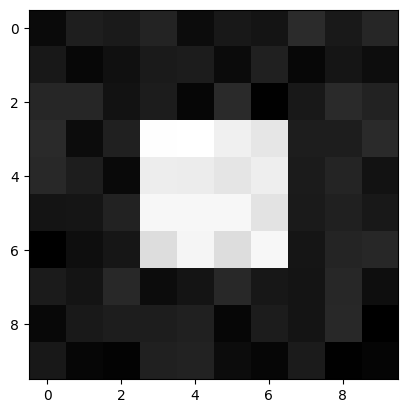

In [9]:
img = np.zeros((10,10)) + np.random.rand(10,10) * 10
img[3:7, 3:7] = 50 + np.random.rand(4,4) * 10

# rescale back to [0,255]
img = img - np.min(img)
img = img / np.max(img) * 255

img = np.round(img)
plt.imshow(img, cmap='gray')

## Create masks for the image

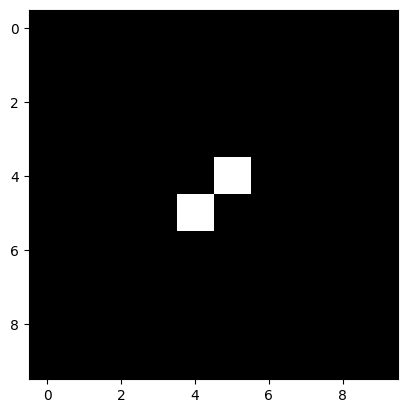

In [10]:
# foreground mask
mask_fg = np.zeros((10,10))
mask_fg[4, 5] = 1
mask_fg[5, 4] = 1

plt.imshow(mask_fg, cmap='gray')

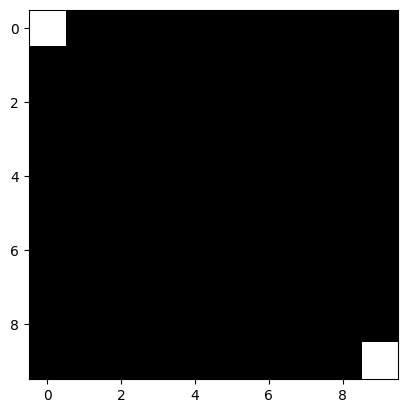

In [11]:
# background mask
mask_bg = np.zeros((10,10))
mask_bg[0, 0] = 1
mask_bg[9, 9] = 1

plt.imshow(mask_bg, cmap='gray')

## Run the segmentation

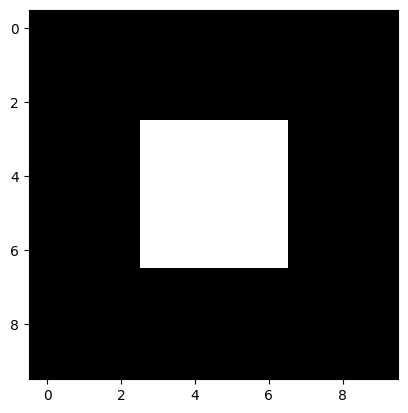

In [12]:
mask = gc.segment(img, mask_fg, mask_bg)

plt.imshow(mask, cmap='gray')

# A simple example with lungs
credits: https://radiopaedia.org/images/157288?lang=gb

In [13]:
# optional download
#!curl -O https://prod-images-static.radiopaedia.org/images/157288/4c1383482027c97c445f418c9b74b3_gallery.jpg

0.0 255.0


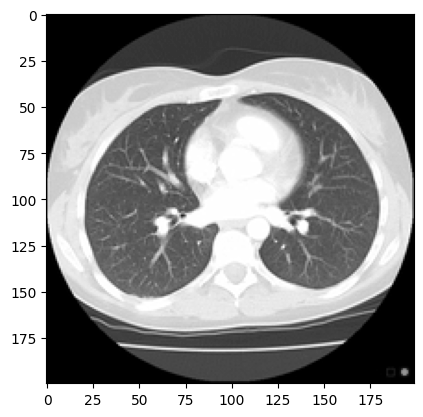

In [14]:
# load jpeg image
img = plt.imread('test_imgs/lungs_ct_smaller.jpeg')

# convert to grayscale
img = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140
img = np.round(img)

plt.figure()
plt.imshow(img, cmap='gray')

print(img.min(), img.max())

## Draw masks

In [15]:
def draw_rectangle(event, x, y, flags, param): 

    size = img.shape[0] // 100

    # select a square region around the clicked point
    x1 = max(x-size, 0)
    x2 = min(x+size, img.shape[1])
    y1 = max(y-size, 0)
    y2 = min(y+size, img.shape[0])
      
    if event == cv2.EVENT_LBUTTONDOWN:

        mask_fg[y1:y2, x1:x2] = 1

        cv2.rectangle(img_to_mask, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    if event == cv2.EVENT_RBUTTONDOWN:

        mask_bg[y1:y2, x1:x2] = 1

        cv2.rectangle(img_to_mask, (x1, y1), (x2, y2), (0, 255, 0), 2)


def draw_masks(img):

    global mask_fg, mask_bg, img_to_mask

    img_to_mask = img.copy()

    img_to_mask = img_to_mask - np.min(img_to_mask)
    img_to_mask = img_to_mask / np.max(img_to_mask)

    mask_fg = np.zeros(img_to_mask.shape)
    mask_bg = np.zeros(img_to_mask.shape)

    title = "Left click for foreground, right click for background, esc to finish."          
    cv2.namedWindow(winname = title) 
    cv2.setMouseCallback(title, draw_rectangle) 
    
    while True:
        cv2.imshow(title, img_to_mask) 
        
        if cv2.waitKey(10) & 0xFF == 27: # escape key to exit
            break
            
    cv2.destroyAllWindows()

    return mask_fg, mask_bg

**This allows the user to select samples of the foreground (with a left click, will show as white circles) and background (right click, will show as black circles). And finish the selection with an ESC key.**

In [16]:
mask_fg, mask_bg = draw_masks(img)

Text(0.5, 1.0, 'Background mask')

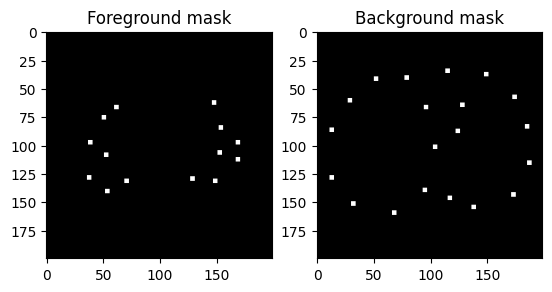

In [17]:
# Visualize the masks
plt.figure()
plt.subplot(1,2,1)
plt.imshow(mask_fg, cmap='gray')
plt.title('Foreground mask')
plt.subplot(1,2,2)
plt.imshow(mask_bg, cmap='gray')
plt.title('Background mask')

In [18]:
# # save the masks as numpy arrays
# np.save('test_imgs/lungs_larger_fg.npy', mask_fg)
# np.save('test_imgs/lungs_larger_bg.npy', mask_bg)

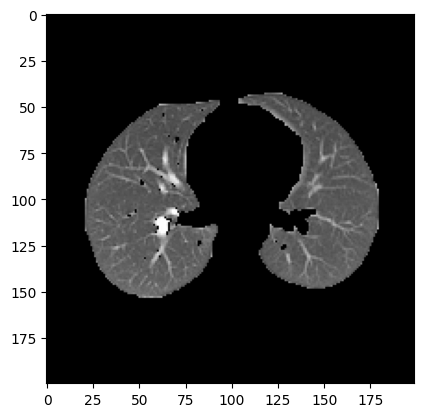

In [19]:
mask = gc.segment(img, mask_fg, mask_bg, sigma=10, neighborhood_sz=4)

plt.imshow(img * mask, cmap='gray')

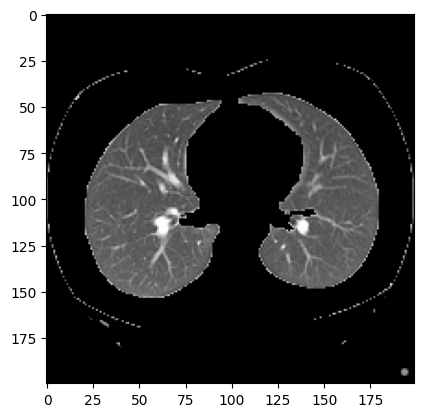

In [20]:
mask = segment_with_pymaxflow(img, mask_fg, mask_bg, sigma=10, neighborhood_sz=4)

plt.imshow(img * mask, cmap='gray')